<a href="https://colab.research.google.com/github/B20204/Vision-Arcadia-Submission/blob/main/Arcadia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gesture detection - Vision Arcadia

## Data collection
The first step in our process will be data colllection ,  we as a team collected the data required by using the script provided under different backgrounds , lightings and conditions. It was a concious decision from our side to not make the data extracted to have any kinda uniformness , both in terms of how the data looks and the metadata part of it , we made sure the sizes are arbiturary , the resolution , the lightings , backgrounds etc to be different , this was done to make sure that we get to Learn and use some kind of preprocessing techniques that helps us build skills and be more upon the type of inputs the model might recive.

## Model

We will be trying to explore 2 different models for data prediction , The first one will be completelty a custom model , using the custom dataset that we have collected.  The second one would employ transfer learning , at the end we can also use some other premade dataset from kaggle or other sources to devlop our models.


## Custom model

We decided to build a model Using the knowledge we received during the sessions of vision arcadia. Firstly we started out by importing the data and making it undergo a little bit of preprocessing.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Concatenate, Input,AveragePooling2D
from tensorflow.keras import layers
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2
import os

### Preprocessing
In the process we tried a lot of preprocessing techniques , firstlly we decided to go with a preprocessor which detects skin color in the image and extracts only that part and o0uputs a contour of the hand in the image , while this preprocessor was succesful for most of the time , but sometimes when the background was also in the skin color range it did not work well and led to not so good results in terms of model accuracy.

so we decided to gave with the much simpler edge extraction technique , grayscaling and normalizing , this happened to be a much simpler and better approach.

In [2]:
"""def preprocess1(img):
  blur = cv2.GaussianBlur(img, (1,1), 0)
  hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)
  lower_color = np.array([108, 23, 82])
  upper_color = np.array([179, 255, 255])
  mask = cv2.inRange(hsv, lower_color, upper_color)
  blur = cv2.medianBlur(mask, 1)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
  mask = cv2.dilate(blur, kernel)
  return mask"""


def grayscalize(img):
  gimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return gimg

def preprocess3(img):
  blur = cv2.GaussianBlur(img, (1,1), 0)
  kernel = np.array([[-1, -1, -1],[-1, 8,-1],[-1, -1, -1]])
  mask = cv2.filter2D(src=blur, ddepth=-1, kernel=kernel)
  return mask

def normalizeImg(img):
  return img/255


**This cell contains the main constants for the model**, We for simplicity and to keep the training time low , have restricted ourselves to model only 5 different gestures.but more gestures can be added to the following book and be trained under appropriate conditions , the model is coded quite modularly that changing the parameters in this cell is fine.

In [3]:

book = {
        0:('/content/drive/MyDrive/Gesture_Data/thumbs up/','Thumbs up'),
        1:('/content/drive/MyDrive/Gesture_Data/w','W'),
        2:('/content/drive/MyDrive/Gesture_Data/one','one'),
        3:('/content/drive/MyDrive/Gesture_Data/Ok_gesture','ok'),
        4:('/content/drive/MyDrive/Gesture_Data/V_gesture','V'),
}

numOfGestures = 5
imgSize = 150

In [4]:
x = []
y = []

for j in range(numOfGestures):
  for i in os.listdir(book[j][0]):
    
    img = cv2.imread(os.path.join(book[j][0],i))
    img = cv2.resize(img,(imgSize,imgSize))
    img = grayscalize(img)
    img = preprocess3(img)
    img = normalizeImg(img)
    x.append(img)
    y.append(j)


x = np.array(x)
y = np.array(y)

from sklearn.model_selection import train_test_split
x = x.reshape(-1,imgSize,imgSize,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
y_train = tf.one_hot(np.array(y_train).reshape(-1), numOfGestures)
y_test = tf.one_hot(np.array(y_test).reshape(-1), numOfGestures)

### Model
We went to write a general model that takes in a few params like number of convolutional layers , nodes, etc and gives back a model according to it , since the nueral network model is just mostly trial and error and varying params, we recited to this method. we then run it through a set of nested for loops that trained and tested the model for various combinations of the parameters , after running the loop for a couple of hours , we logged the test accuracy in a list along with the parameters at each loop , at the end we picked the best parameter from the output list.

`constructModel(i,(2,2),j,k,i)`

### The List
[[ i, j, k, val_acc]]<br />
[[32, 0, 0, 0.42424243688583374],<br />
 [32, 0, 1, 0.40909090638160706],<br />
 [32, 0, 2, 0.3787878751754761],<br />
 [32, 0, 3, 0.39393940567970276],<br />
 [32, 1, 0, 0.5151515007019043],<br />
 [32, 1, 1, 0.469696968793869],<br />
 [32, 1, 2, 0.469696968793869],<br />
 [32, 1, 3, 0.42424243688583374],<br />
 [32, 2, 0, 0.4545454680919647],<br />
 [32, 2, 1, 0.4545454680919647],<br />
 [32, 2, 2, 0.3787878751754761],<br />
 [32, 2, 3, 0.4545454680919647],<br />
 [32, 3, 0, 0.3636363744735718],<br />
 [32, 3, 1, 0.28787878155708313],<br />
 [32, 3, 2, 0.39393940567970276],<br />
 [32, 3, 3, 0.4545454680919647],<br />
 [64, 0, 0, 0.469696968793869],<br />
 [64, 0, 1, 0.42424243688583374],<br />
 [64, 0, 2, 0.42424243688583374],<br />
 [64, 0, 3, 0.39393940567970276],<br />
 [64, 1, 0, 0.5303030014038086],<br />
 [64, 1, 1, 0.43939393758773804],<br />
 [64, 1, 2, 0.5151515007019043],<br />
 [64, 1, 3, 0.5303030014038086],<br />
 [64, 2, 0, 0.5],<br />
 [64, 2, 1, 0.4848484992980957],<br />
 [64, 2, 2, 0.43939393758773804],<br />
 [64, 2, 3, 0.4545454680919647],<br />
 [64, 3, 0, 0.39393940567970276],<br />
 [64, 3, 1, 0.39393940567970276],<br />
 [64, 3, 2, 0.3636363744735718],<br />
 [64, 3, 3, 0.40909090638160706],<br />
 [128, 0, 0, 0.42424243688583374],<br />
 [128, 0, 1, 0.42424243688583374],<br />
 [128, 0, 2, 0.42424243688583374],<br />
 [128, 0, 3, 0.40909090638160706],<br />
 [128, 1, 0, 0.5303030014038086],<br />
 [128, 1, 1, 0.5],<br />
 [128, 1, 2, 0.5],<br />
 [128, 1, 3, 0.469696968793869],<br />
 [128, 2, 0, 0.3787878751754761],<br />
 [128, 2, 1, 0.469696968793869],<br />
 [128, 2, 2, 0.4848484992980957],<br />
 [128, 2, 3, 0.4545454680919647],<br />
 [128, 3, 0, 0.469696968793869],<br />
 [128, 3, 1, 0.39393940567970276],<br />
 [128, 3, 2, 0.40909090638160706],<br />
 [128, 3, 3, 0.3787878751754761]]

In [5]:
def constructModel(convlayers,convfiltsize,numberofconvlayers,numofdense,denselayers):
  model = Sequential(name="CNN")
  model.add(Conv2D(16, convfiltsize, activation='relu',input_shape=X_train.shape[1:]))
  model.add(MaxPooling2D(convfiltsize))
  for i in range(numberofconvlayers):
    model.add(Conv2D(convlayers,convfiltsize, activation='relu'))
    model.add(MaxPooling2D(convfiltsize))
  model.add(MaxPooling2D())
  model.add(Flatten())
  for i in range(numofdense):
    model.add(Dense(denselayers, activation='relu'))
  model.add(Dense(numOfGestures, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer="adam", metrics=['accuracy'])
  #model.summary()
  return model

We construct and train the model , we selected epochs after running it for various loops and checking the rise and fall of test accuracy and validation accuracy at the end we settled for 8 epochs, as it looked like the sweet spot and for epochs > 8 the model started overfitting.

In [6]:
model = constructModel(64,(2,2),1,0,64)
model.fit(x=X_train, y=y_train, epochs=8)
loss,acc = model.evaluate(x=X_test, y=y_test)

Epoch 1/8
20/20 [==============================] - 33s 38ms/step - loss: 1.6523 - accuracy: 0.2408
Epoch 2/8
20/20 [==============================] - 1s 28ms/step - loss: 1.4984 - accuracy: 0.4446
Epoch 3/8
20/20 [==============================] - 1s 28ms/step - loss: 1.3061 - accuracy: 0.5008
Epoch 4/8
20/20 [==============================] - 1s 28ms/step - loss: 1.1108 - accuracy: 0.5923
Epoch 5/8
20/20 [==============================] - 1s 27ms/step - loss: 0.8852 - accuracy: 0.7223
Epoch 6/8
20/20 [==============================] - 1s 28ms/step - loss: 0.6858 - accuracy: 0.7961
Epoch 7/8
20/20 [==============================] - 1s 28ms/step - loss: 0.5019 - accuracy: 0.8844
Epoch 8/8
3/3 [==============================] - 0s 34ms/step - loss: 1.4518 - accuracy: 0.5429


### Save and load
We saved the model so that we can later use it in rasp-pi.

In [ ]:
model.save('/content/drive/MyDrive/Gesture_Data/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Gesture_Data/saved_model/my_model/assets


In [8]:
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Gesture_Data/saved_model/my_model')
model2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 12ms/step - loss: 0.5525 - accuracy: 0.8857


[0.5524985790252686, 0.8857142925262451]

# Transfer learning

Altough we constructed a custom model , with the amount of data and computation time and power we have we have developed a pretty basic model ,we can do much better if we use the idea of transfer learning , as we saw in the sessions using the models which are trained over millions of images we can produce much better results in a short training span.

The transfer learning model is coded [here](https://colab.research.google.com/drive/1FLbhcJFGYgynPsV3SI5p3hjUpPq-FJhI?usp=sharing). (use educational id for access)

In [9]:
transferLearningModel = tf.keras.models.load_model('/content/drive/MyDrive/Gesture_Data/transferLearningModel/tl_model')

We have reloded the data so that we can give it to the model as input ,(the model requires input to be in (224 x 224)

In [10]:
x = []
y = []
imgSize = 224
for j in range(numOfGestures):
  for i in os.listdir(book[j][0]):
    
    img = cv2.imread(os.path.join(book[j][0],i))
    img = cv2.resize(img,(imgSize,imgSize))
    img = normalizeImg(img)
    x.append(img)
    y.append(j)


x = np.array(x)
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
y_train = tf.one_hot(np.array(y_train).reshape(-1), numOfGestures)
y_test = tf.one_hot(np.array(y_test).reshape(-1), numOfGestures)

### Results

As we can observe we get a whooping 85 % test accuracy , this is much much better than our custom model , this shows us how powerful transfer learning can be. we will be using this as our prime modal in our pi along with the signLang Modal.

In [13]:
transferLearningModel.evaluate(X_test,y_test)

3/3 [==============================] - 0s 65ms/step - loss: 0.5770 - accuracy: 0.8143


[0.5769748687744141, 0.8142856955528259]

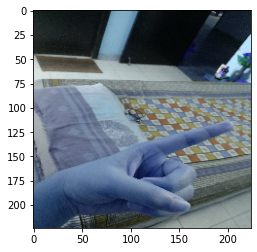

val: one
pred:  Thumbs up


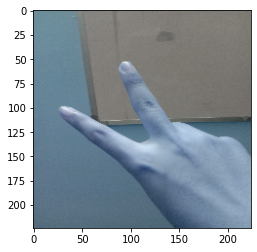

val: V
pred:  V


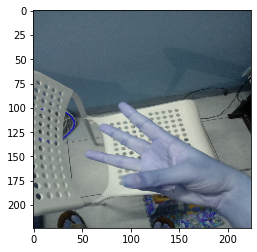

val: W
pred:  W


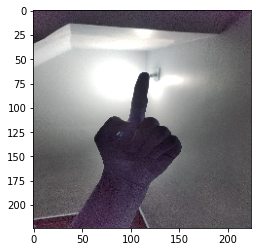

val: one
pred:  one


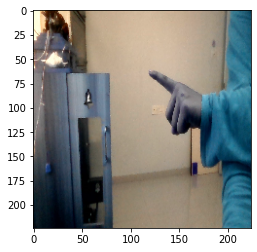

val: one
pred:  one


In [14]:
for i in range(5):
  plt.imshow(X_test[i])
  plt.show()
  print('val:',book[np.argmax(y_test[i])][1])
  print('pred: ',book[np.argmax(transferLearningModel.predict(X_test)[i])][1])

# Sign language Model using fine tuned datasets

For another use case in our rasp-pi , we decided to go easy and develop a standard model using MNIST sign lang dataset available in kaggle  [Dataset here](https://www.kaggle.com/datamunge/sign-language-mnist) , once done with the custom model our mind was on what if we developed a small module that can be used in cafe's restuarents and counters which can help people with sign language so that people who dont even know sign language can interact with the needful people. so we decided to use the classic mnist dataset , this was just a small try from our part during the extended time.

In [11]:
! pip install kaggle

In [12]:
! mkdir  ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
! cp kaggle.json ~/.kaggle/

In [15]:
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! kaggle datasets download datamunge/sign-language-mnist

 89% 56.0M/62.6M [00:00<00:00, 68.5MB/s]
100% 62.6M/62.6M [00:00<00:00, 80.4MB/s]


In [17]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


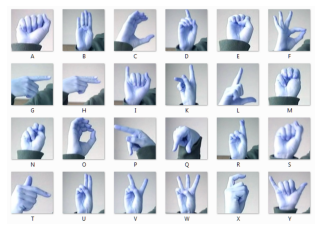

In [18]:
plt.axis('off')
plt.imshow(cv2.imread('/content/amer_sign2.png'))

In [19]:
import pandas as pd

In [20]:
df1 = pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')
df2 = pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')

In [21]:
y_test = tf.keras.utils.to_categorical(df1['label'],num_classes=25)
y_train = tf.keras.utils.to_categorical(df2['label'],num_classes=25)
X_test = np.array(df1.drop(['label'], axis = 1)).reshape(-1,28,28,1)
X_train = np.array(df2.drop(['label'], axis = 1)).reshape(-1,28,28,1)

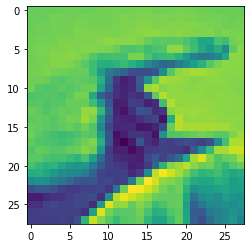

In [22]:
plt.imshow(np.array(df1.iloc[0][1:]).reshape((28,28)))

### Model

We modeled a basic CNN , again we used loops and picked up the best set of params, we get a solid 86 % test accuracy which is quite good for this simple CNN model.

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(25, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=2)
model.evaluate(X_test,y_test)

Epoch 1/2
858/858 [==============================] - 28s 32ms/step - loss: 1.0974 - accuracy: 0.8236
Epoch 2/2
225/225 [==============================] - 2s 9ms/step - loss: 0.7428 - accuracy: 0.8646


[0.7427933812141418, 0.8646124005317688]

We save the model to use it in the rasp pi model.

In [25]:
model.save('/content/drive/MyDrive/Gesture_Data/signLangModel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Gesture_Data/signLangModel/assets


# Conclusion

In the process of vision arcadia , we have learnt a lot . firstly a huge thanks from our team to everybody behind this to have kept our spirits high and curious even in the dark online sem times. with our extracted models we will continue the story in the rasp-pi. we tried our best to learn and try out new stuff in this short span of time, thanks for the oppurtunity.

# References and Resources used



1.   [CNN - wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network)
2.   [Sentdex - youtube](https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ)
3.   [Edge detection - opencv ](https://learnopencv.com/edge-detection-using-opencv/)
4.   [Hand detection - a useful blog](https://towardsdatascience.com/training-a-neural-network-to-detect-gestures-with-opencv-in-python-e09b0a12bdf1)
5.   [CNN - finger classification](https://www.youtube.com/watch?v=SgKOTgrGnXI&t=141s)
6.   [Transfer learning Model](https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4)
7.   [Transfer learning - youtube](https://www.youtube.com/watch?v=yofjFQddwHE)
8.   [Transfer learning - Tensorflow docs](https://www.tensorflow.org/tutorials/images/transfer_learning)
9.   [MNIST SignLang dataset](https://www.kaggle.com/datamunge/sign-language-mnist)
10.  [Arcadia sessions](https://github.com/NippunSharma/MLSessions)
11.  [Image processing docs](https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html)
12. [Our drive link with the collected data](https://drive.google.com/drive/folders/1dYb5-zrgOoG3vy256kehZ-kw-dkxZW4G?usp=sharing)